# Error propagation

Estimate the error of a function according to the errors of its vaiables

https://en.wikipedia.org/wiki/Propagation_of_uncertainty

Importing libraries

In [1]:
from sympy import init_printing, Function, symbols, Symbol, Derivative, sqrt, log, Eq
from IPython.display import display
init_printing(use_latex=True, latex_mode='equation*') 

Define variables

In [2]:
F = Function('F')

f, x, b_s, b_0, b_x = symbols ('f, x, \\beta_s, \\beta_0, \\beta_x')

Df = Symbol('\Delta f')
Dx = Symbol('\Delta x')
Db = Symbol('\Delta \\beta')

Define a mathematical function $F(x, \beta_s, \beta_0, \beta_t)$ :

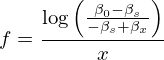

In [3]:
variables = (x, b_s, b_0, b_x)

deltadict =	{x: Dx, b_s: Db, b_0: Db, b_x: Db}

F = 1/x * log( (b_0 - b_s) / (b_x - b_s) )

display(Eq(f,F))

Calculate the partial derevitives of the function G for each of its variables, sum up the squares of the obtained derivatives:

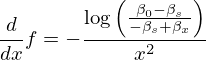

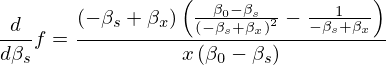

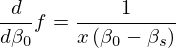

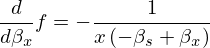

In [4]:
f_sum_squares = 0
F_sum_squares = 0

for variable in variables:
    display(Eq(Derivative(f, variable), Derivative(F, variable).doit()))
    f_sum_squares = f_sum_squares + (Derivative(f, variable)) * (deltadict[variable])**2
    F_sum_squares = F_sum_squares + (Derivative(F, variable)) * (deltadict[variable])**2

The square root of the sum is the estimated error of the function F

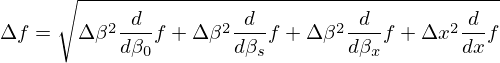

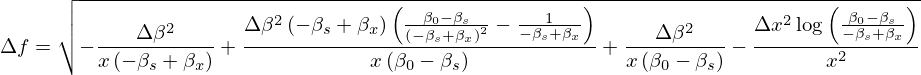

In [5]:
DF = sqrt (F_sum_squares)
Df_ = sqrt (f_sum_squares)

display(Eq(Df,Df_))
display(Eq(Df,DF.doit()))

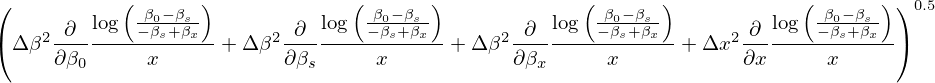

In [6]:
F_num = F.evalf(subs={x:120, b_0:100, b_s:20, b_x:60})
display(F_num)

DF_num = DF.evalf(subs={x:120, Dx:1, b_0:100, b_s:20, b_x:60, Db:0.1})
display(DF_num)